# Tratamiento de Variables categoricas

In [86]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../python-ml-course/datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix ="City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
column_names = df_new.columns.tolist()

In [7]:
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [20]:
df_new = df[column_names].join(dummy_gender)

In [21]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [22]:
column_names = df_new.columns.tolist()

In [23]:
df_new = df_new[column_names].join(dummy_city_tier)

In [24]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [25]:
x= df_new[feature_cols]
y = df_new["Total Spend"]

NameError: name 'feature_cols' is not defined

In [26]:
df_new.columns

Index(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend',
       'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2',
       'City_Tier 3'],
      dtype='object')

In [54]:
feature_cols = ['Monthly Income',
       'Transaction Time' ,'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2',
       'City_Tier 3',"Record"]

In [55]:
x= df_new[feature_cols]
y = df_new["Total Spend"]

In [56]:
lm = LinearRegression()

lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print(lm.intercept_)
print(lm.coef_)

-335.73800174537246
[ 1.47442269e-01  1.56391583e-01 -1.33088707e+02  1.33088707e+02
  7.83785050e+01  5.20259633e+01 -1.30404468e+02  7.72149205e+02
  6.42429817e+00]


In [58]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14744226897448584),
 ('Transaction Time', 0.15639158306366313),
 ('Gender_Female', -133.0887066317063),
 ('Gender_Male', 133.08870663170583),
 ('City_Tier 1', 78.37850497640302),
 ('City_Tier 2', 52.02596334431941),
 ('City_Tier 3', -130.4044683207225),
 ('Record', 772.1492053631358),
 ('Age ', 6.424298167612881)]

In [59]:
#R cuadrado

In [60]:
lm.score(x,y)

0.9187458997709432

El modelo queda 
  Total Spend = 'Monthly Income'* 0.14744226897448584)+
 'Transaction Time'* 0.15639158306366313)+
 'Gender_Female'* -133.0887066317063)+
 'Gender_Male'* 133.08870663170583)+
 'City_Tier 1'* 78.37850497640302+
 'City_Tier 2'* 52.02596334431941+
 'City_Tier 3'* -130.4044683207225+
 'Record'*772.1492053631358+
 'Age ' *6.424298167612881+
9

In [ ]:
df_new["prediction"]='Monthly Income'* 0.14744226897448584)+ 'Transaction Time'* 0.15639158306366313)+ 'Gender_Female'* -133.0887066317063)+ 'Gender_Male'* 133.08870663170583)+ 'City_Tier 1'* 78.37850497640302+ 'City_Tier 2'* 52.02596334431941+ 'City_Tier 3'* -130.4044683207225+ 'Record'*772.1492053631358+ 'Age ' *6.424298167612881+

In [62]:
SSD = np.sum((df_new['Prediction'] - df_new['Total Spend'])**2)

KeyError: 'Prediction'

In [63]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [64]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4916.525671
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4690.334781
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5200.539037
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8130.623235
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3704.958811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3400.162051
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8036.302905
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,8965.152397
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8251.415238


In [66]:
SSD = np.sum((df_new['prediction'] - df_new['Total Spend'])**2)


In [67]:
SSD

1503788028.5340145

In [ ]:
RSE

In [ ]:
sales_mean

In [ ]:
error

## Eliminar variables dummies

In [70]:
dummy_gender = pd.get_dummies(df["Gender"] , prefix = 'Gender')
dummy_city_tier =pd.get_dummies(df["City Tier"] , prefix = "City")
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [73]:
dummy_city_tier = pd.get_dummies(df["City Tier"] , prefix = "City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [98]:
df

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856


In [101]:
column_names = df.columns.values.tolist()


In [102]:
column_names


['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [105]:
dummy

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2357,0,1
2358,0,1
2359,1,0
2360,1,0


In [107]:
df

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856


In [106]:
df_new = df[column_names].join(dummy_gender)

KeyError: "['Gender_Female', 'Gender_Male'] not in index"

In [104]:

column_names = df_new.columns.values.tolist()
df_new = df[column_names].join(dummy_city_tier)
df_new.head()

KeyError: "['Gender_Female', 'Gender_Male'] not in index"

# Transformacion de variables para conseguir una relacion no lineal

In [8]:
import matplotlib.pyplot as plt

In [4]:
data_auto = pd.read_csv("../python-ml-course/datasets/auto/auto-mpg.csv")

In [5]:
data_auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
405,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [7]:
data_auto.shape

(406, 9)

Text(0, 0.5, 'Millas por galeon')

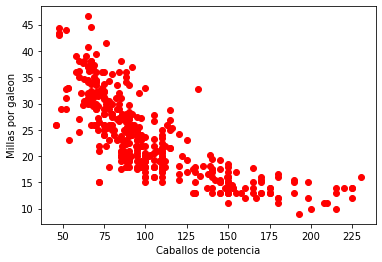

In [14]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"]= data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"] , data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Millas por galeon")

## Modelo de regresion lineal
 *npg = a + b * horsepower

In [30]:
x= data_auto["horsepower"].fillna(data_auto['horsepower'].mean())
y= data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [31]:
lm =LinearRegression()
lm.fit(x[:,np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
x_data =  x[:,np.newaxis]

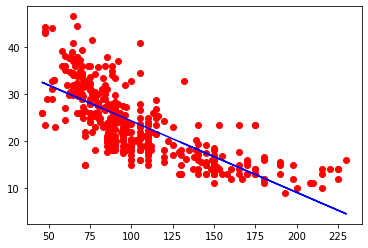

In [35]:
%matplotlib inline
plt.plot(x,y ,"ro")
plt.plot(x, lm.predict(x_data) , color= "blue")


In [36]:
lm.score(x_data,y)

0.574653340645025

In [43]:
SSD =np.sum((y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD , RSE ,y_mean , "%" + str(error*100)

(10315.75196006092, 5.046879480825511, 23.51457286432162, '%21.46277336163346')

## Modelo de regresion cuadratico
 * mpg = a+ b * housepower ^2

In [44]:
x_data = x **2
x_data = x_data[:,np.newaxis]

In [45]:
lm = LinearRegression()
lm.fit(x_data , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

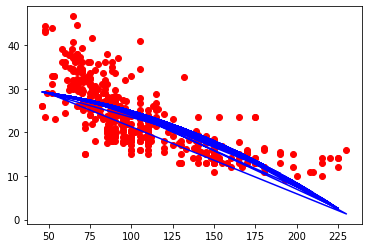

In [47]:
%matplotlib inline
plt.plot(x,y ,"ro")
plt.plot(x, lm.predict(x_data) , color= "blue")


In [46]:
lm.score(x_data, y)

0.4849887034823205

In [48]:
SSD =np.sum((y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD , RSE ,y_mean , "%" + str(error*100)

(12490.350340501926, 5.553410772769817, 23.51457286432162, '%23.6168898529981')

## Modelo de regresion lineal y cuadratico
mpg = a+ b horsepower + c housepower^2

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [52]:
poly = PolynomialFeatures(degree=2)

In [60]:
x_data = poly.fit_transform(x[:, np.newaxis])


In [61]:
lm =LinearRegression()
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
x

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
401     86.0
402     52.0
403     84.0
404     79.0
405     82.0
Name: horsepower, Length: 406, dtype: float64

In [62]:
lm.score(x_data, y)

0.6439066584257469

In [63]:
lm.intercept_

55.02619244708036

In [65]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.0261 - 0.43404318JHP + 0.00112615hp^2

In [76]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data, y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(x_data, y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(x_data, y, lm.predict(x_data))

Regresión de grado 2
R2:0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689%
Regresión de grado 3
R2:0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.51457286432162, error: 19.622473106036676%
Regresión de grado 4
R2:0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.51457286432162, error: 19.55891250126878%
Regresión de grado 5
R2:0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]
SSD: 8373.171393636556, RSE: 4.546921735442387, Y_mean: 23.51457286432162, error: 19.336612073193884%
Regresión de grado 6
R2:0.6572844624926477
-157.07318244319492

In [74]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

## El problema de los outliers

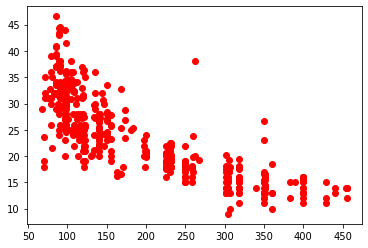

In [81]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [90]:
x = data_auto["displacement"].fillna(data_auto["displacement"].mean())
x = x[:,np.newaxis]   
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())                                  
                                     
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lm.score(x,y)

0.6261049762826918

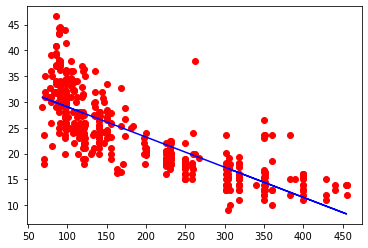

In [94]:
%matplotlib inline
plt.plot(x,y ,"ro")
plt.plot(x, lm.predict(x) , color= "blue")

In [96]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [98]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [101]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [105]:
x = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
x = x[:,np.newaxis]   
y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())                                  
                                     
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm.score(x,y)

0.6466514317531822